# Preprocessing I

We present different techniques for preprocess the raw data, turning into something usefull and fill the missing or incorrect values.


By Mario Martín, modify by Manuel Gijón on April 2024.

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# These are just visualizations options for pandas' outputs
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.precision", 3)

%matplotlib inline

# Read the data

In [2]:
data = pd.read_csv(
    "./Dataset/smoking.csv",  # We can select a local file or pass an url
    sep = ',', 
)
print(f"We have {data.shape[0]} samples and {data.shape[1]} features.")  # Shape returns (nº samples, nº features)
print(data.describe())

data["ID"]  # Lets see it to see what it contains -> Just indexes, so we can remove them

We have 55692 samples and 27 features.
             ID        age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)   systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride        HDL        LDL  hemoglobin  Urine protein  serum creatinine        AST        ALT        Gtp  dental caries    smoking
count  55692.00  55692.000   55692.000   55692.000  55692.000       55692.000        55692.000      55692.000       55692.000  55692.000   55692.000            55692.000    55692.000     55692.000  55692.000  55692.000   55692.000      55692.000         55692.000  55692.000  55692.000  55692.000      55692.000  55692.000
mean   27845.50     44.183     164.649      65.865     82.046           1.013            1.007          1.026           1.026    121.494      76.005               99.312      196.901       126.666     57.290    114.965      14.623          1.087             0.886     26.183     27.036     39.952          0.213    

0            0
1            1
2            2
3            3
4            4
         ...  
55687    55676
55688    55681
55689    55683
55690    55684
55691    55691
Name: ID, Length: 55692, dtype: int64

In [3]:
data = data.drop(labels = 'ID', axis = 1)  # OBS: axis = 1 to drop columns

print(f"We have {data.shape[0]} samples and {data.shape[1]} features.")
data.head()

We have 55692 samples and 26 features.


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


## Shorten names (Sergi)
Metadades extretes de [l'arxiu de metadades](https://medical.yonsei.ac.kr/we/?module=file&act=procFileDownload&file_srl=459938&sid=4ba5676b6fc2b61886ccf788504e2056&module_srl=584) (en coreà, passar-lo pel Google Translator).

Sistema de mesura Coreà de la vista: [link](https://blog.english.bnviit.com/2022/03/04/difference-between-us-uk-and-korean-vision-scoring/)

In [4]:
data = data.rename(columns = {
    'gender':'gender',          # 1 male, 0 female
    'age':'age',                # age in strats of 5 years
    'height(cm)':'height',      # height measurement in cm
    'weight(kg)':'weight',      # weight measurement in kg
    'waist(cm)':'waist',        # waist measurement in cm
    'eyesight(left)':'sightL',  # from 0.1 to 2.0
    'eyesight(right)':'sightR', # from 0.1 to 2.0
    'hearing(left)':'hearL',    # 0 normal, 1 abnormal
    'hearing(right)':'hearR',   # 0 normal, 1 abnormal
    'systolic':'systolicP',     # pressure in mmHg
    'relaxation':'diastolicP',  # pressure in mmHg
    'fasting blood sugar':'fastBSugar', # mg/dL * 0 value missing processing (processed)
    'Cholesterol':'cholesterol',        # mg/dL * 0 value missing processing (processed)
    'triglyceride':'triglyceride',      # mg/dL * 0 value missing processing (processed)
    'HDL':'hdl',                        # mg/dL * 0 value missing processing (processed)
    'LDL':'ldl',                        # mg/dL * 0 value missing processing (processed)
    'hemoglobin':'hemoglobin',  # g/dL * 0 value missing processing (processed)
    'Urine protein':'uProtein', # 1: Negative (-) 2: Weak (±) 3: Positive (+1) 4: Positive (+2) 5: Positive (+3) 6: Positive (+4)
    'serum creatinine':'sCreatinine',   # mg/dL * 0 value missing processing (processed)
    'AST':'ast',  # U/L * 0 value missing processing (processed)
    'ALT':'alt',  # U/L * 0 value missing processing (processed)
    'Gtp':'gtp',  # U/L * 0 value missing processing (processed)
    'oral':'oral',            # Due for oral examination (only yes?)
    'dental caries':'caries', # Assuming 0 no, 1 yes
    'tartar':'tartar',        # 0 no, 1 yes
    'smoking':'smoking'       # Assuming 0 not-smoking, 1 smoking
})
data.columns

Index(['gender', 'age', 'height', 'weight', 'waist', 'sightL', 'sightR',
       'hearL', 'hearR', 'systolicP', 'diastolicP', 'fastBSugar',
       'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'uProtein',
       'sCreatinine', 'ast', 'alt', 'gtp', 'oral', 'caries', 'tartar',
       'smoking'],
      dtype='object')

# Uni-variate description of the data

In [5]:
data.describe(include = "all")  # Generate statistical values for each feature

,gender,age,height,weight,waist,sightL,sightR,hearL,hearR,systolicP,diastolicP,fastBSugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,uProtein,sCreatinine,ast,alt,gtp,oral,caries,tartar,smoking
count,55692,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692.000,55692,55692.000,55692,55692.000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN
freq,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55692,NaN,30940,NaN
mean,NaN,44.183,164.649,65.865,82.046,1.013,1.007,1.026,1.026,121.494,76.005,99.312,196.901,126.666,57.290,114.965,14.623,1.087,0.886,26.183,27.036,39.952,NaN,0.213,NaN,0.367
std,NaN,12.071,9.195,12.820,9.274,0.487,0.486,0.158,0.160,13.676,9.679,20.796,36.298,71.640,14.739,40.926,1.564,0.405,0.222,19.355,30.948,50.291,NaN,0.410,NaN,0.482
min,NaN,20.000,130.000,30.000,51.000,0.100,0.100,1.000,1.000,71.000,40.000,46.000,55.000,8.000,4.000,1.000,4.900,1.000,0.100,6.000,1.000,1.000,NaN,0.000,NaN,0.000
25%,NaN,40.000,160.000,55.000,76.000,0.800,0.800,1.000,1.000,112.000,70.000,89.000,172.000,74.000,47.000,92.000,13.600,1.000,0.800,19.000,15.000,17.000,NaN,0.000,NaN,0.000
50%,NaN,40.000,165.000,65.000,82.000,1.000,1.000,1.000,1.000,120.000,76.000,96.000,195.000,108.000,55.000,113.000,14.800,1.000,0.900,23.000,21.000,25.000,NaN,0.000,NaN,0.000
75%,NaN,55.000,170.000,75.000,88.000,1.200,1.200,1.000,1.000,130.000,82.000,104.000,220.000,160.000,66.000,136.000,15.800,1.000,1.000,28.000,31.000,43.000,NaN,0.000,NaN,1.000


In [6]:
# Remove "oral" feature, as it has only one unique value, it doesn't give any information
data = data.drop(labels= 'oral', axis=1)

# Treatment of categorical data

First we are going to start by applying one hot encoding to the binary categorical data. This is what each attribute will pass to maen:
    - gender: 0 -> male, 1 -> female
    - hearL: 0 -> normal, 1 -> abnormal
    - hearR: 0 -> normal, 1 -> abnormal
    - tartar: 0 -> N, 1 -> Y

In [7]:
data['gender'] = data['gender'].map(lambda x: int(x == 'M'))
data['hearL'] = data['hearL'].map(lambda x: int(x != 1.0))
data['hearR'] = data['hearR'].map(lambda x: int(x != 1.0))
data['tartar'] = data['tartar'].map(lambda x: int(x == 'Y'))

In [8]:
data.head()

,gender,age,height,weight,waist,sightL,sightR,hearL,hearR,systolicP,diastolicP,fastBSugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,uProtein,sCreatinine,ast,alt,gtp,caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,0,0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,0,0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,0,0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,0,0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,0,0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


We are going to pass uProtein values to integers, as it can be seen in the code below, the values represent categories.

In [9]:
data['uProtein'].unique()

array([1., 3., 2., 4., 5., 6.])

In [10]:
data['uProtein'] = data['uProtein'].map(lambda X: int(X))
data['uProtein'].unique()

array([1, 3, 2, 4, 5, 6])

# Blindness treatment

Eliminate the blindness cases

In [11]:
data = data[data['sightL'] != 9.9]
data = data[data['sightR'] != 9.9]

In [12]:
print("SightL:")
print("Blind People: ", data[data['sightL'] == 9.9]['sightL'].count(), "Total instances: ", data['sightL'].count())
print("SightR:")
print("Blind People: ", data[data['sightR'] == 9.9]['sightR'].count(), "Total instances: ", data['sightR'].count())

SightL:
Blind People:  0 Total instances:  55518
SightR:
Blind People:  0 Total instances:  55518


## Boxplots and histograms
We are going to use tools built in pandas' objects themselves instead of relying on external libraries.

/tmp/ipykernel_10522/1656999259.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2)


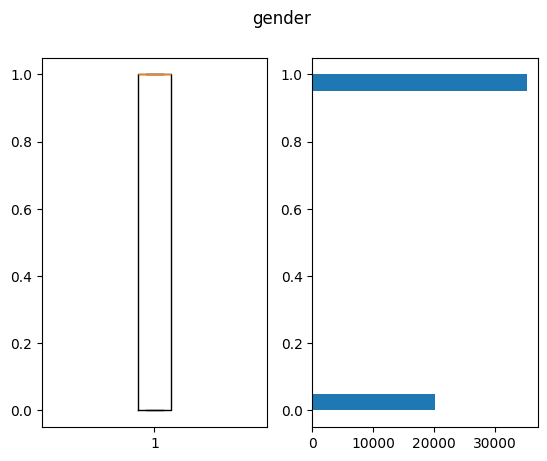

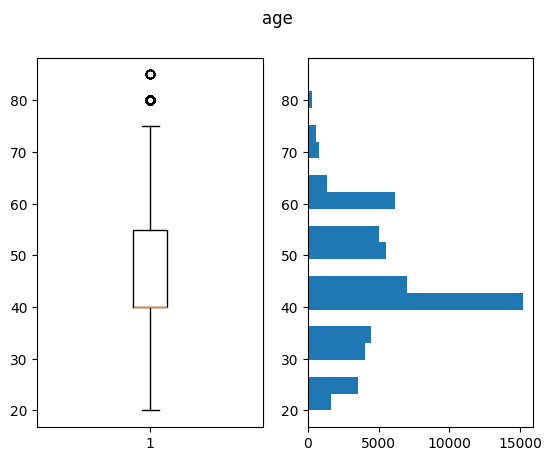

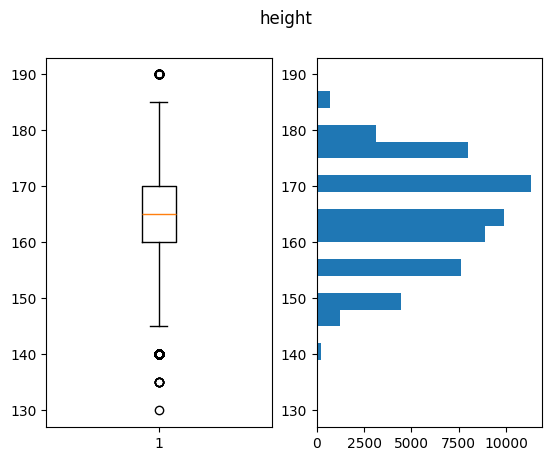

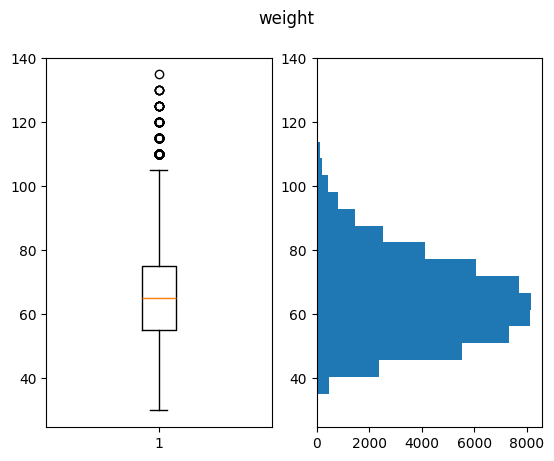

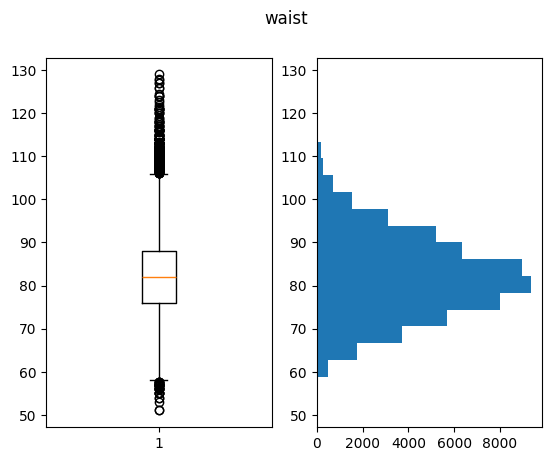

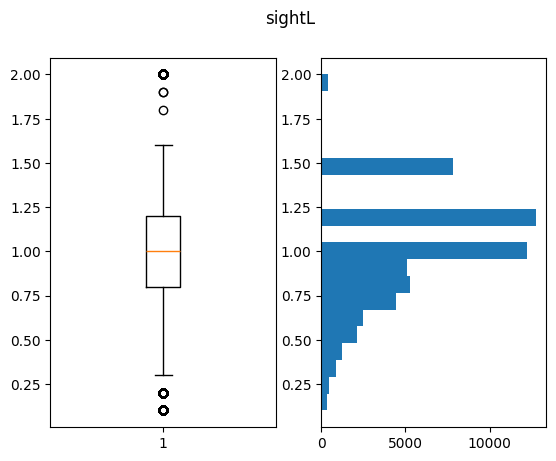

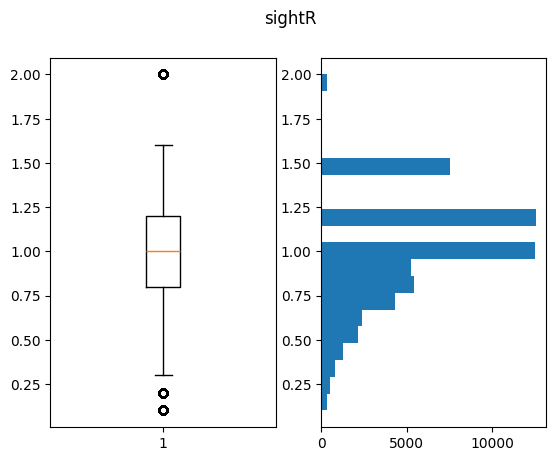

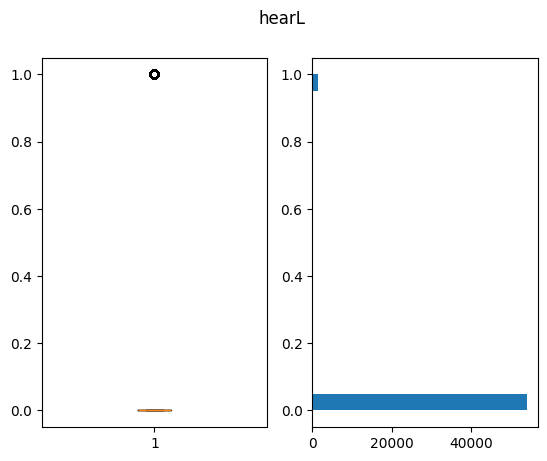

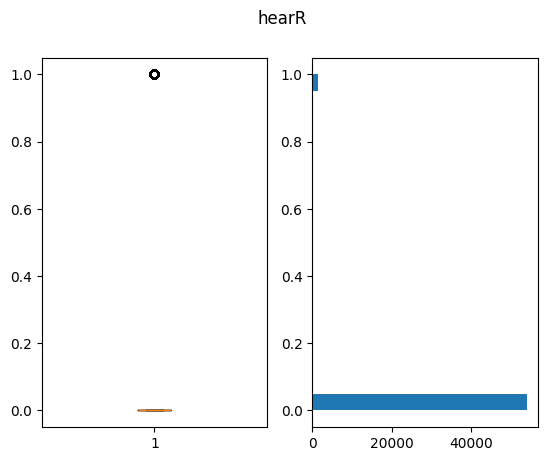

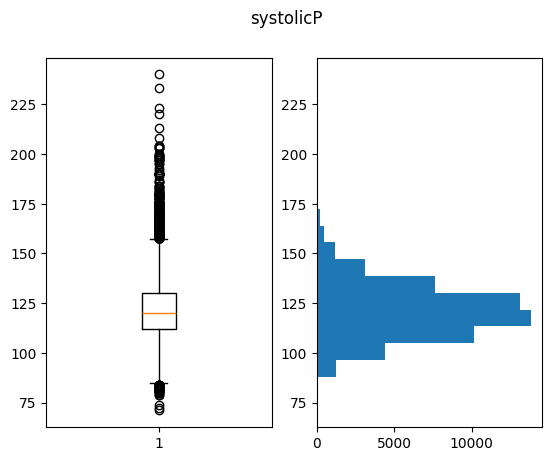

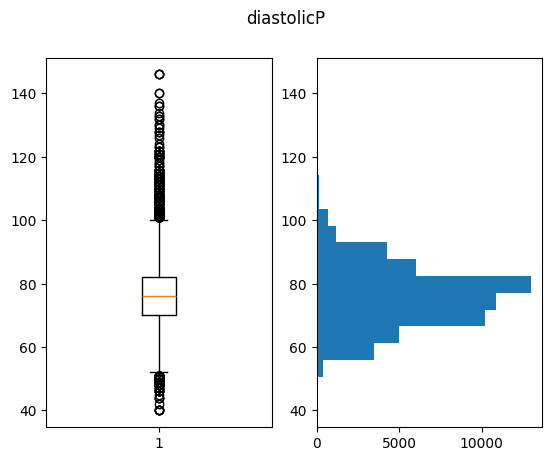

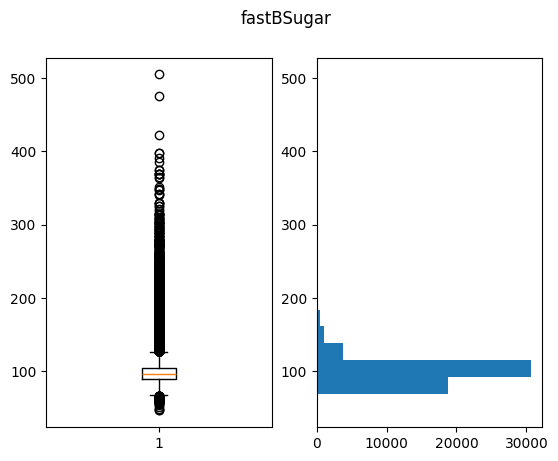

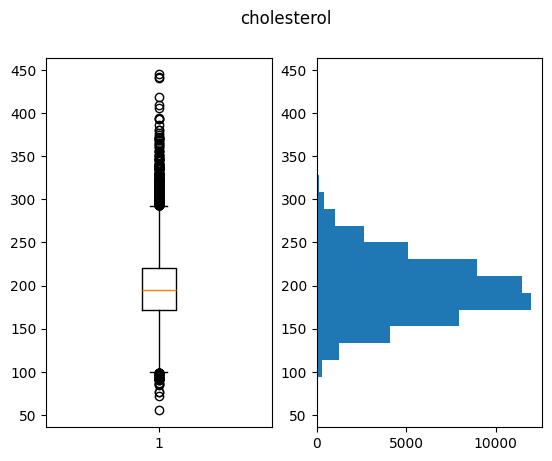

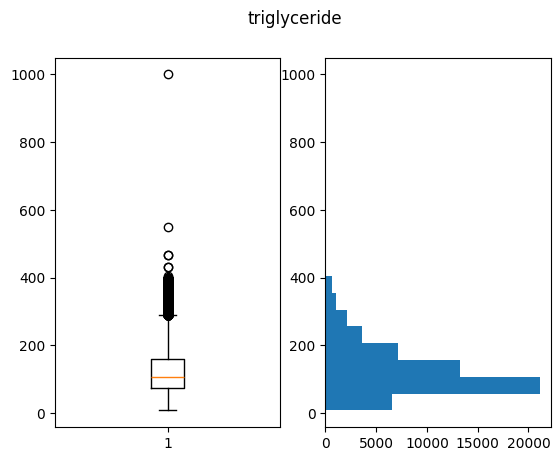

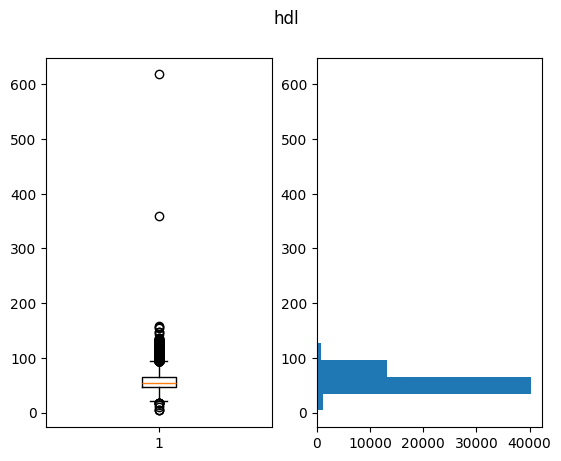

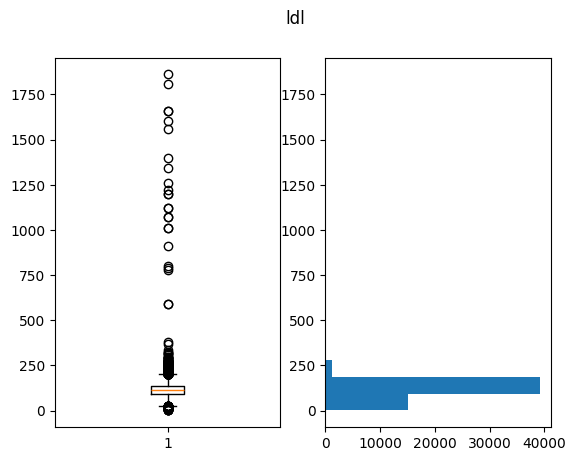

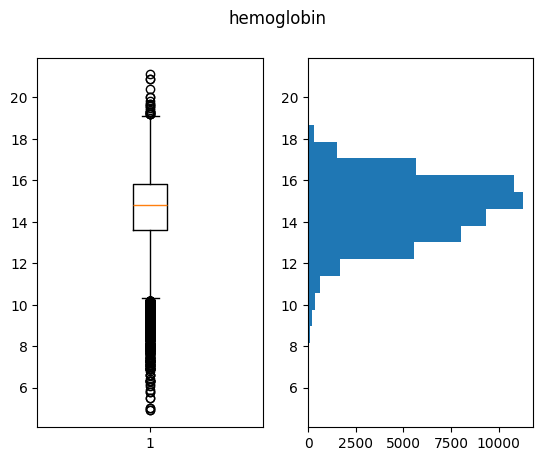

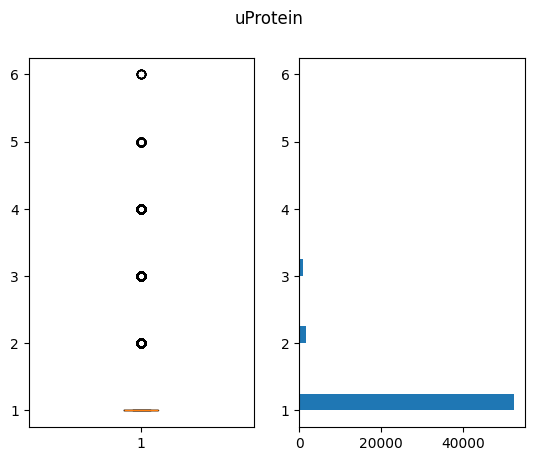

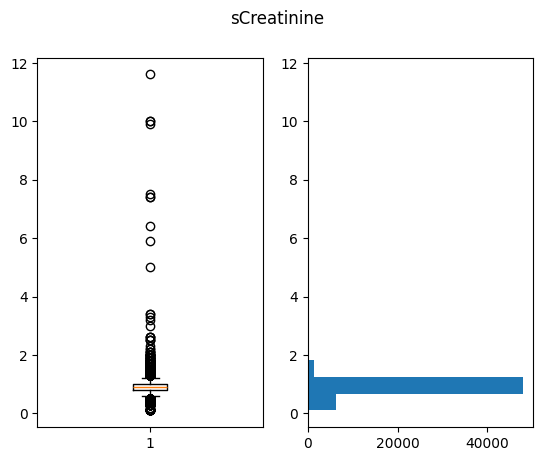

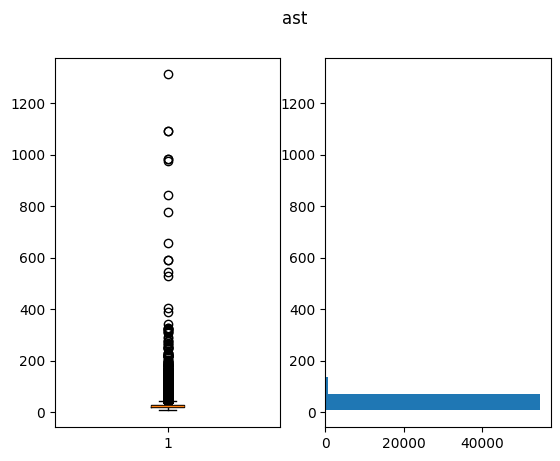

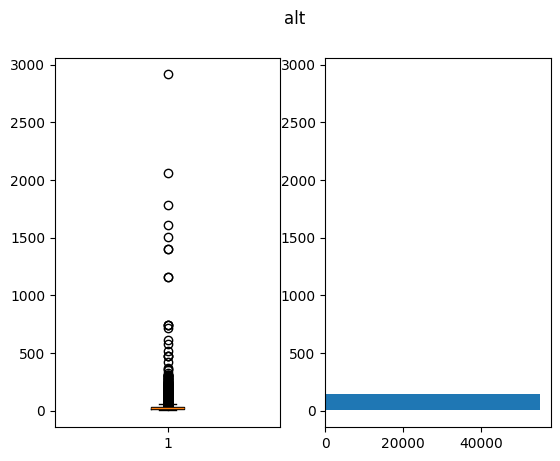

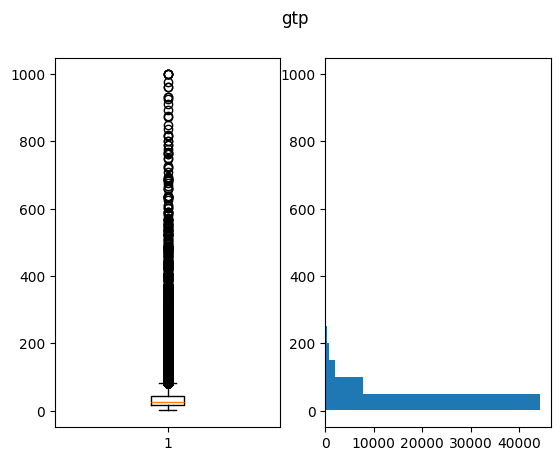

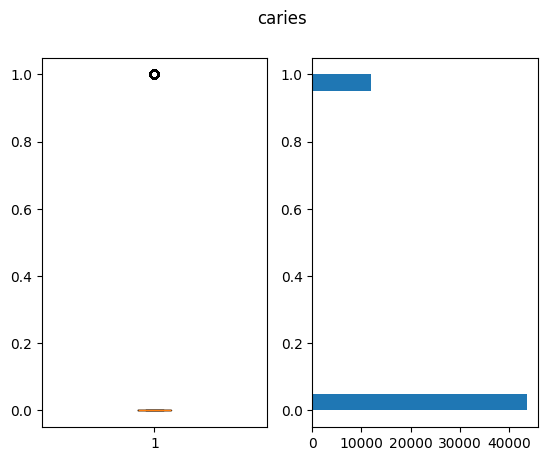

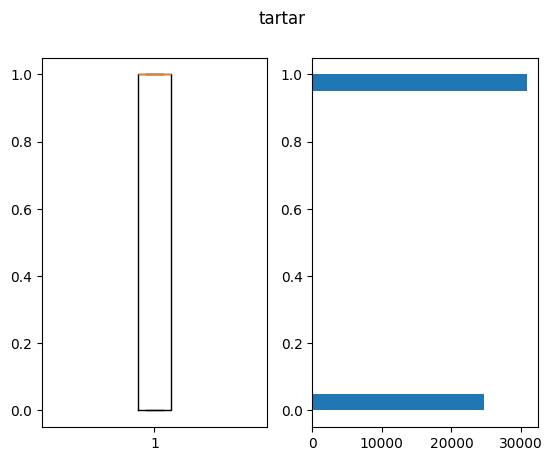

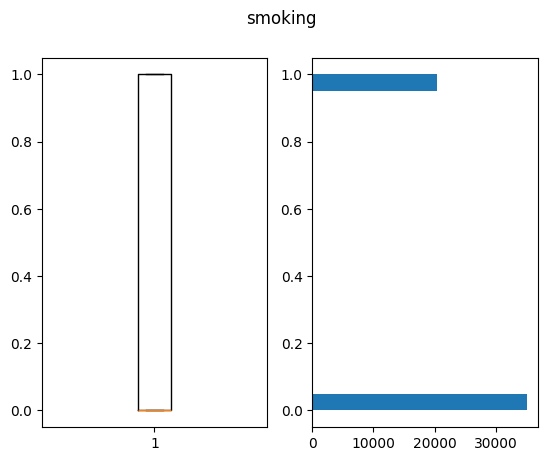

In [13]:
# (Sergi) visualitzar tots els boxplots cadascun en el seu rang
numeric_data = data.select_dtypes(include=np.number)

for i in numeric_data.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(i)
    ax1.boxplot(data[i])
    ax2.hist(data[i], orientation='horizontal', bins=20)

### Observations:
- age: spike in 40~45
- height: outliers on low values, appears normal dist
- weight: outliers on high values, appears normal dist
- waist: ouliers on high values, appears normal dist
- sightL/R: 9.9 indicates blindness (unbalanced blind)
- hearL/R: categorical, very unbalanced
- systolicP/diastolicP: ouliers on high values, appears normal dist
- bloodBSugar: ouliers on high values, *doesn't seem* to be a normal dist
- cholesterol: ouliers on high values, appears normal dist
- triglyceride: ouliers on high values, *doesn't seem* to be a normal dist
- hdl/ldl: very high outliers
- hemoglobin: tail towards low values
- uprotein: unbalanced towards value 1
- screatinine/ast/alt: very high outliers
- gtp: tail towards high values, *doesn't seem* to be a normal dist
- caries: lightly unbalanced to 0
- smoking: lightly unbalanced to non-smokers

In [14]:
# Lets create masks to select data 
mask_female = data["gender"] == 0  # OBS: the mask itself returns a pandas Series containing
                                          # True and False for all the samples, True where conditions holds
                                          # so be aware that this is not like a WHERE function in regular DBs.
female = data[mask_female]

male = data[data["gender"] != 0]  # directly, without creating an extra variable

/tmp/ipykernel_10522/2471758530.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1)


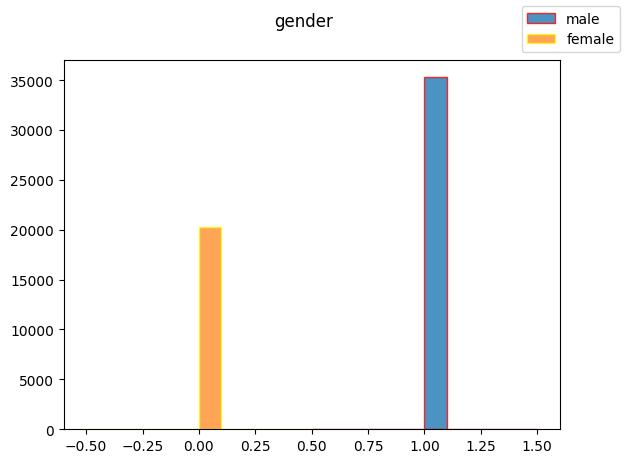

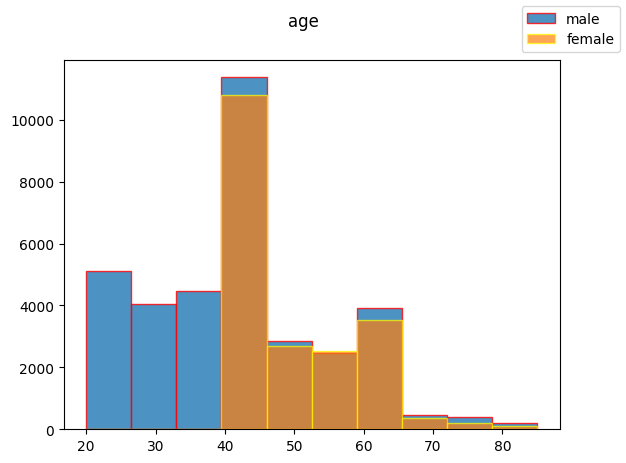

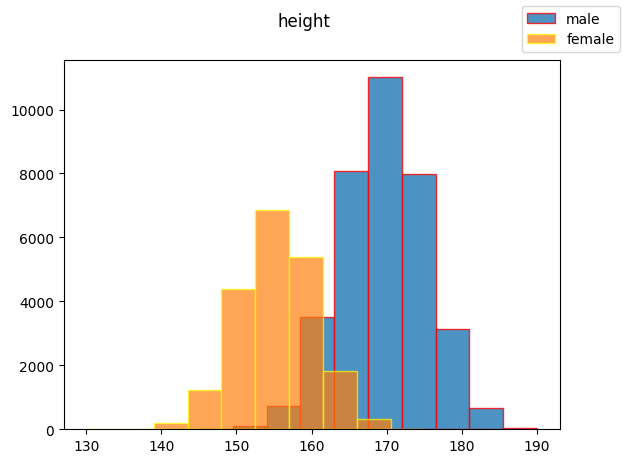

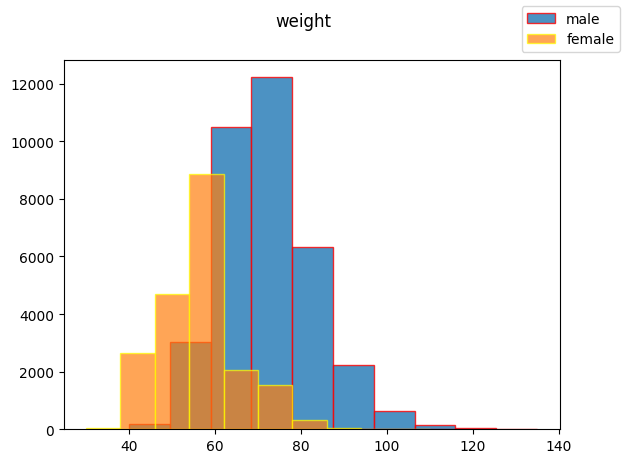

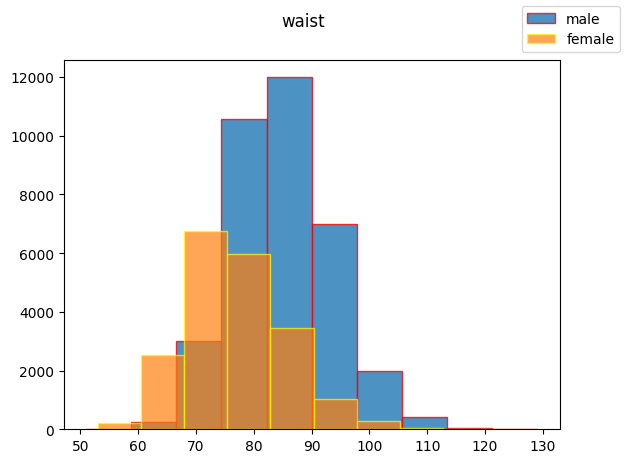

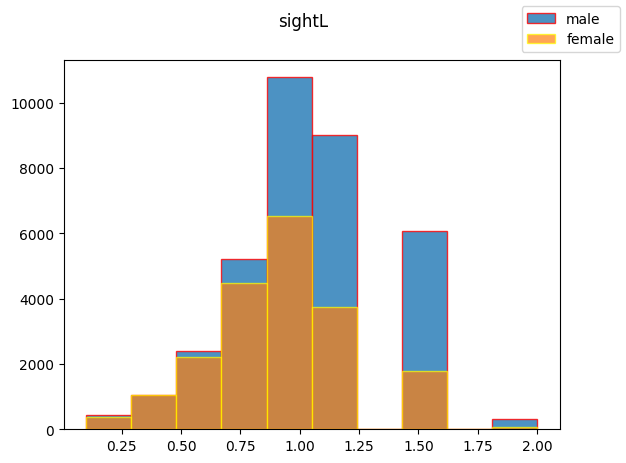

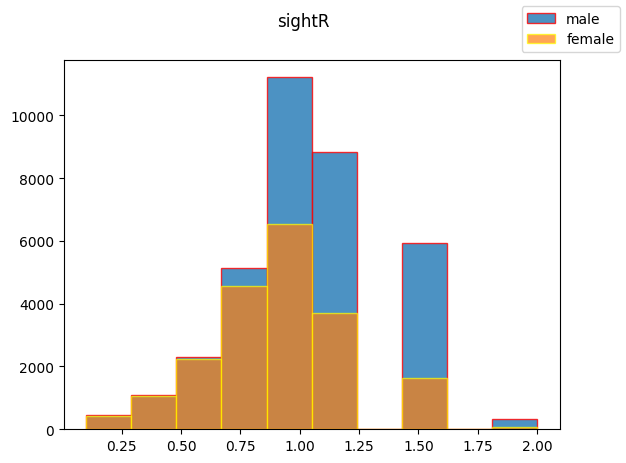

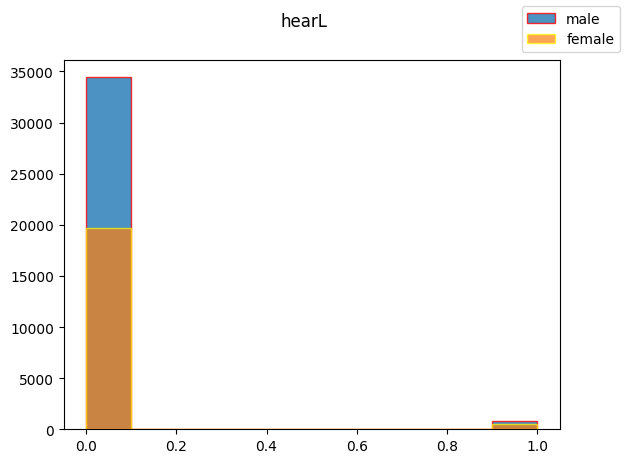

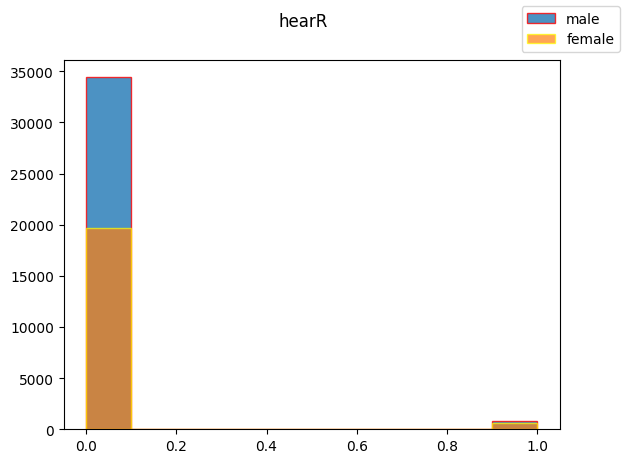

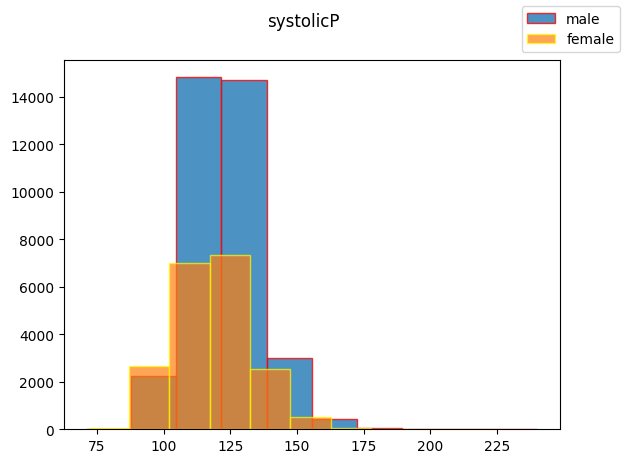

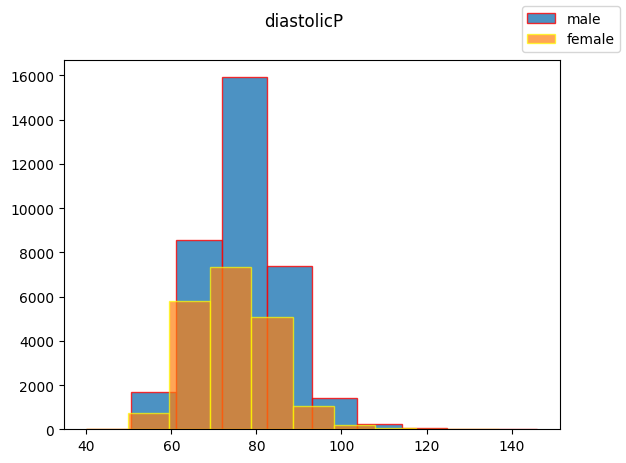

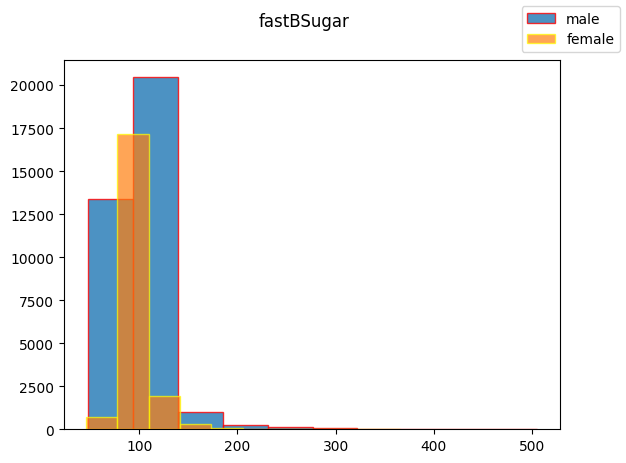

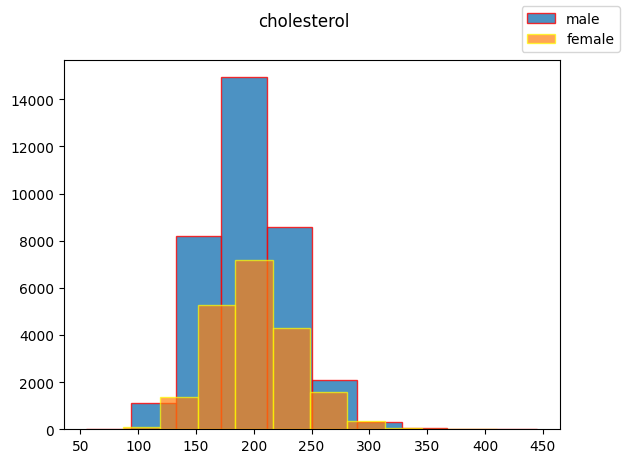

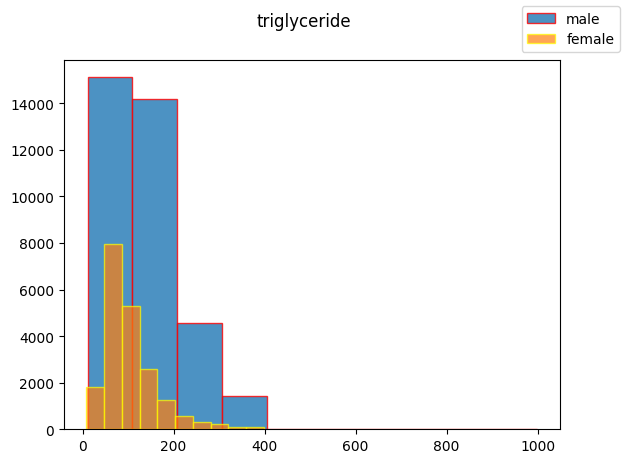

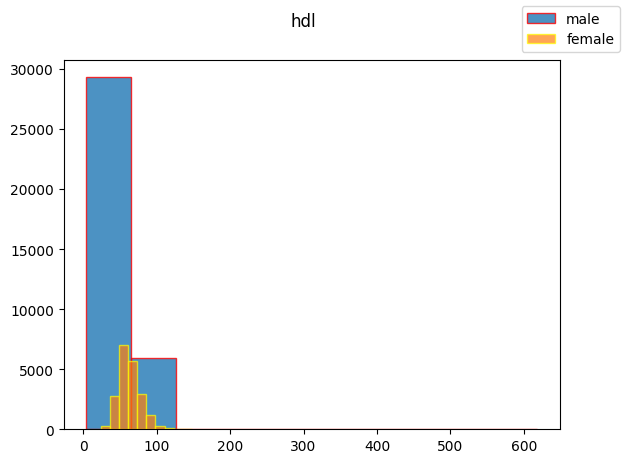

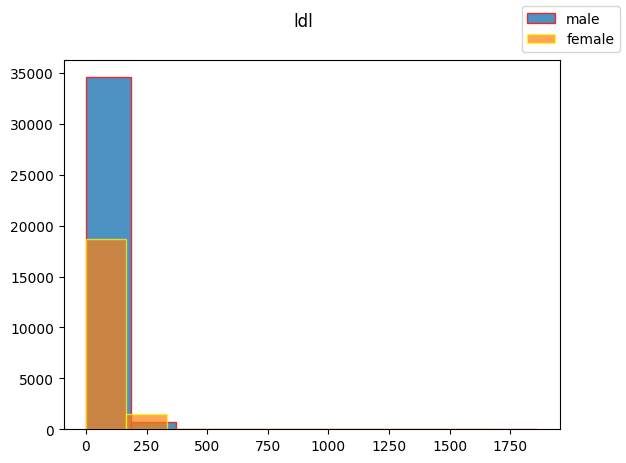

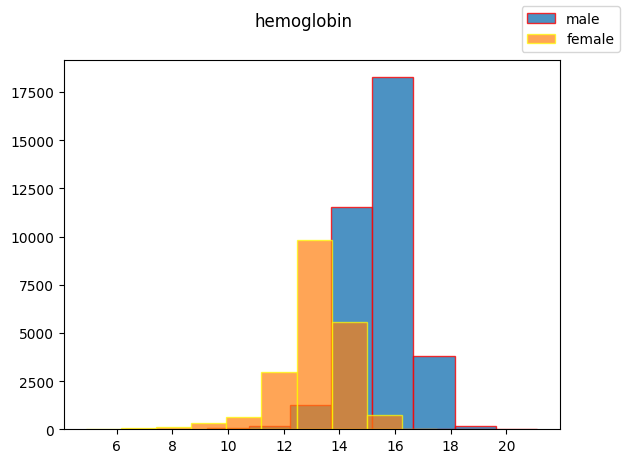

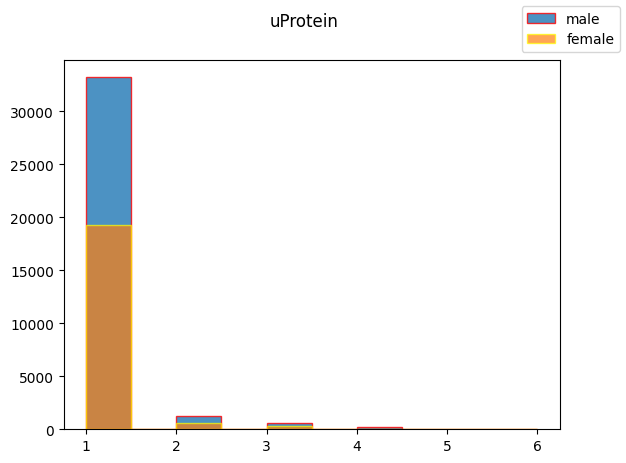

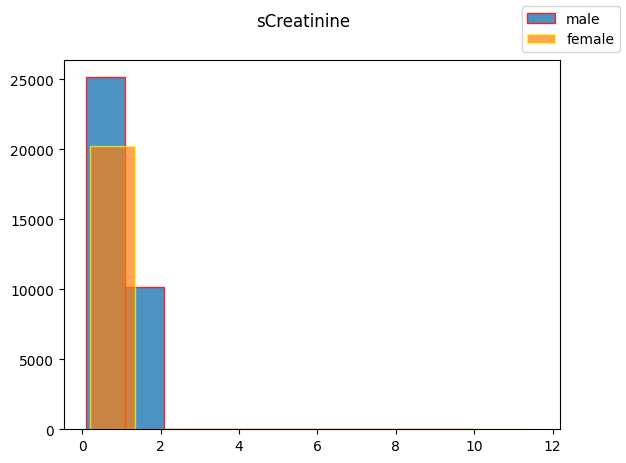

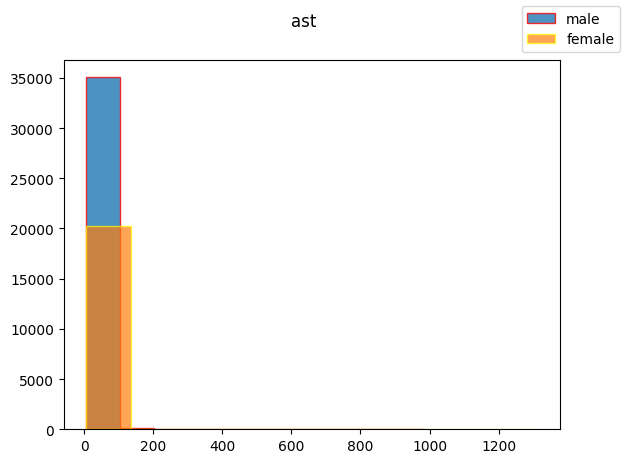

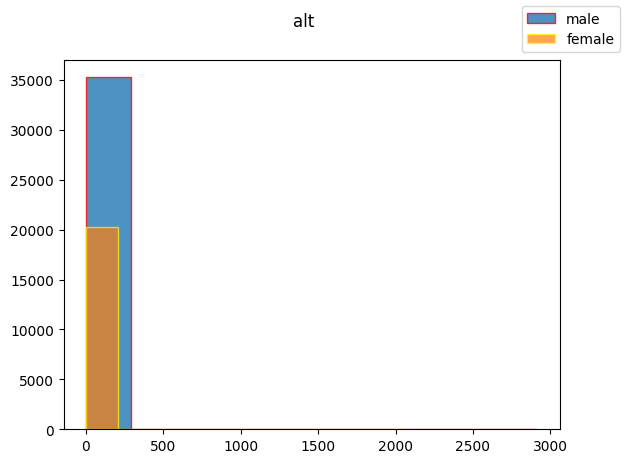

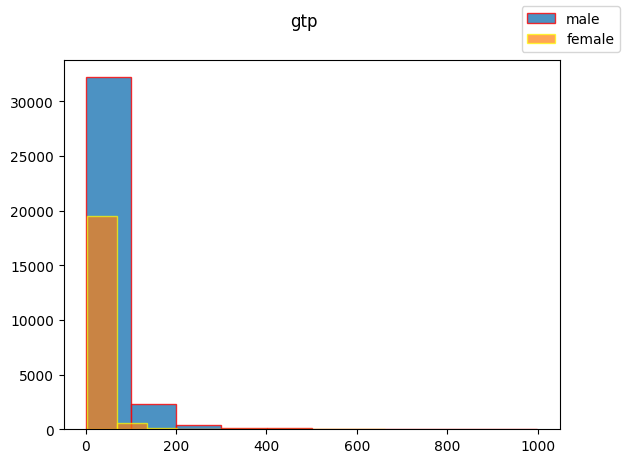

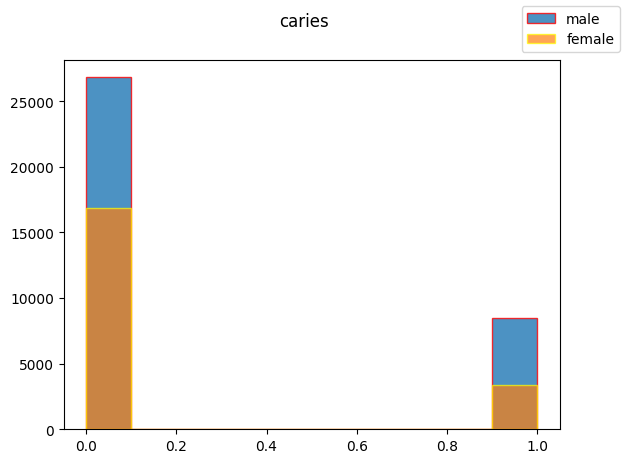

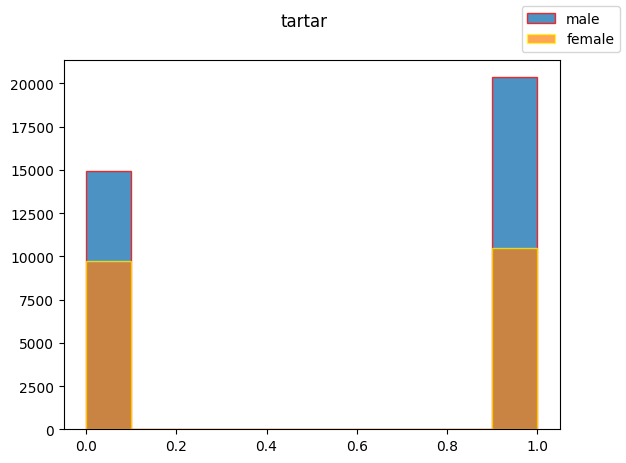

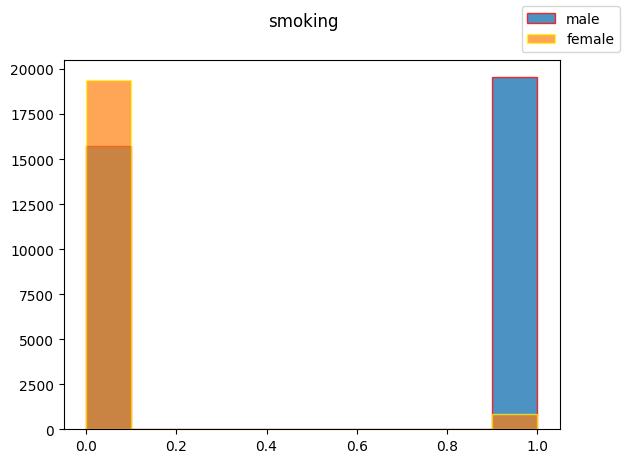

In [15]:
# plotting first histogram
male_numeric_data = male.select_dtypes(include=np.number)
female_numeric_data = female.select_dtypes(include=np.number)

for i in numeric_data.columns:
    fig, ax = plt.subplots(1, 1)
    fig.suptitle(i)
    ax.hist(male_numeric_data[i], label='male', alpha=.8, edgecolor='red')
    ax.hist(female_numeric_data[i], label='female', alpha=0.7, edgecolor='yellow')
    fig.legend()

# female.hist(
#     #column = ["height(cm)"],
#     xlabelsize=0,
#     ylabelsize=0,
#     bins = 10,
#     figsize = [7,7],
# )
# male.hist(
#     #column = ["height(cm)"],
#     xlabelsize=0,
#     ylabelsize=0,
#     bins = 10, 
#     figsize = [7,7]
# )

### Observations
- Males smoke a LOT more (more smokers than non-smokers)
- Difference in age distribution


## Identify errors or ouliers - unicariate analysis

In [16]:
numeric_data = data.select_dtypes(include=np.number)

corrMat = numeric_data.corr(method = "pearson")
corrMat.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1, axis=None).format(precision=3)

# There are not many correlated variables, most correlated are:
# age <-> height & weight
# weight <-> waist
# HDL <-> height & weight
# sightR <-> sightL
# ldl <-> cholesterol
# hemoglobin <-> height & weight & waist
# alt <-> ast
# smoking <-> hemoglobin !!

,gender,age,height,weight,waist,sightL,sightR,hearL,hearR,systolicP,diastolicP,fastBSugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,uProtein,sCreatinine,ast,alt,gtp,caries,tartar,smoking
gender,1.000,-0.291,0.742,0.576,0.420,0.178,0.185,-0.010,-0.013,0.168,0.178,0.098,-0.085,0.242,-0.307,-0.042,0.703,0.016,0.515,0.096,0.168,0.237,0.085,0.056,0.511
age,-0.291,1.000,-0.480,-0.325,-0.028,-0.333,-0.328,0.203,0.207,0.133,0.051,0.182,0.056,0.015,0.007,0.044,-0.264,0.029,-0.110,0.033,-0.064,0.013,-0.115,-0.081,-0.163
height,0.742,-0.480,1.000,0.676,0.380,0.238,0.243,-0.078,-0.079,0.081,0.113,0.020,-0.082,0.157,-0.214,-0.048,0.540,0.006,0.391,0.042,0.126,0.140,0.080,0.056,0.397
weight,0.576,-0.325,0.676,1.000,0.823,0.167,0.169,-0.050,-0.053,0.267,0.272,0.136,0.027,0.325,-0.359,0.041,0.494,0.033,0.330,0.120,0.251,0.210,0.074,0.060,0.304
waist,0.420,-0.028,0.380,0.823,1.000,0.036,0.038,0.022,0.019,0.317,0.293,0.211,0.066,0.362,-0.376,0.073,0.388,0.046,0.238,0.143,0.253,0.243,0.044,0.046,0.227
sightL,0.178,-0.333,0.238,0.167,0.036,1.000,0.697,-0.093,-0.099,-0.041,0.005,-0.068,-0.003,0.024,-0.019,-0.006,0.141,-0.025,0.074,-0.012,0.033,0.004,0.016,0.020,0.092
sightR,0.185,-0.328,0.243,0.169,0.038,0.697,1.000,-0.093,-0.103,-0.035,0.009,-0.073,-0.003,0.025,-0.022,-0.004,0.145,-0.023,0.080,-0.013,0.033,0.010,0.024,0.017,0.100
hearL,-0.010,0.203,-0.078,-0.050,0.022,-0.093,-0.093,1.000,0.510,0.054,0.009,0.040,-0.023,0.004,-0.019,-0.017,-0.026,0.015,0.004,0.018,0.005,0.012,-0.017,-0.036,-0.024
hearR,-0.013,0.207,-0.079,-0.053,0.019,-0.099,-0.103,0.510,1.000,0.048,0.002,0.040,-0.022,0.001,-0.017,-0.015,-0.032,0.020,0.008,0.010,-0.005,0.009,-0.016,-0.027,-0.020
systolicP,0.168,0.133,0.081,0.267,0.317,-0.041,-0.035,0.054,0.048,1.000,0.761,0.173,0.060,0.199,-0.089,0.017,0.187,0.046,0.074,0.083,0.095,0.166,0.030,0.007,0.074


### Finding errors (or outliers) with bi-variate analysis

Lets consider this situation: we think that we have an outlier in one feature, but we do not known a specific statistical test for the distribution that this data follow (assuming we are able to identify it for sure).

In this situation we have another **tool** that is the one that we are going to present here: using a highly correlated feature, apply a linear regression between two variables and use the fact that we know how the errors are distributed (**they follow a normal distribution**, [justification](https://towardsdatascience.com/are-the-error-terms-normally-distributed-in-a-linear-regression-model-15e6882298a4)) to apply a statistical test to them (to the errors).

Remember that we consider an outlier of a sample of points that follow a normal distribution of mean $\mu$ and std $\sigma$ to all the points (x) in the region defined by:
$$
    \mu - 2 * \sigma < x 
$$
and 
$$
       x > \mu + 2 * \sigma  
$$

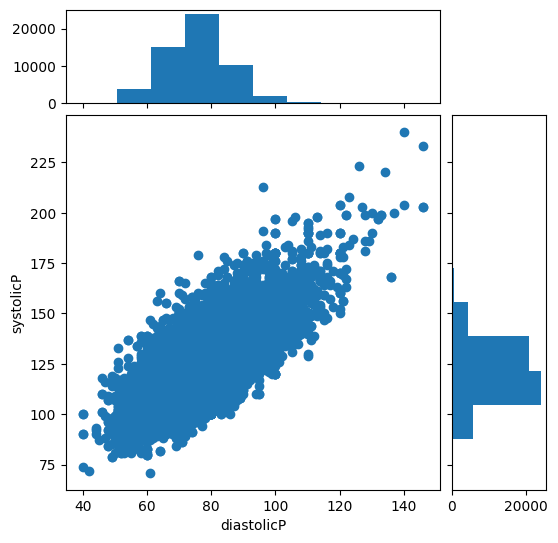

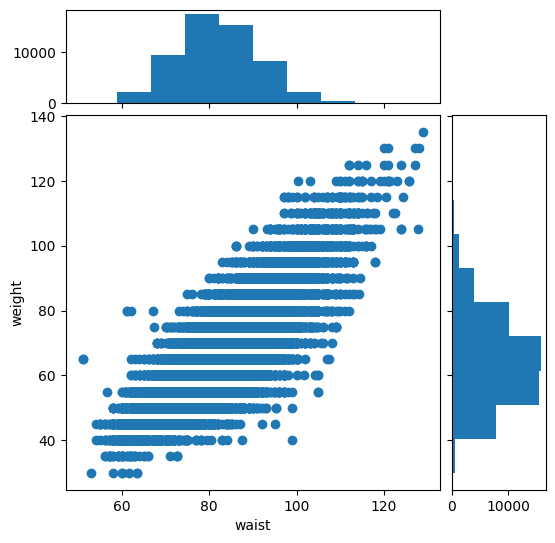

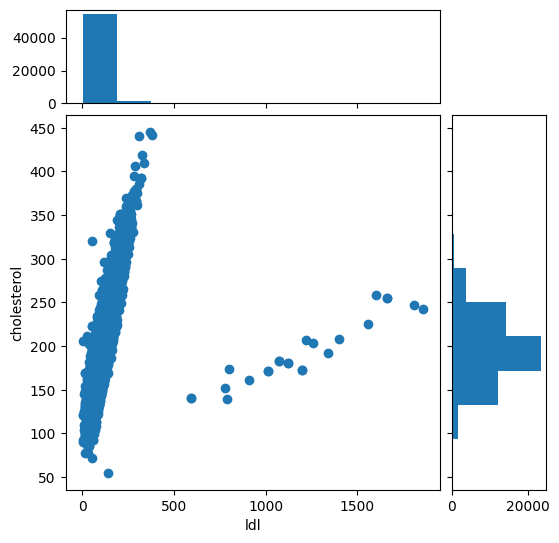

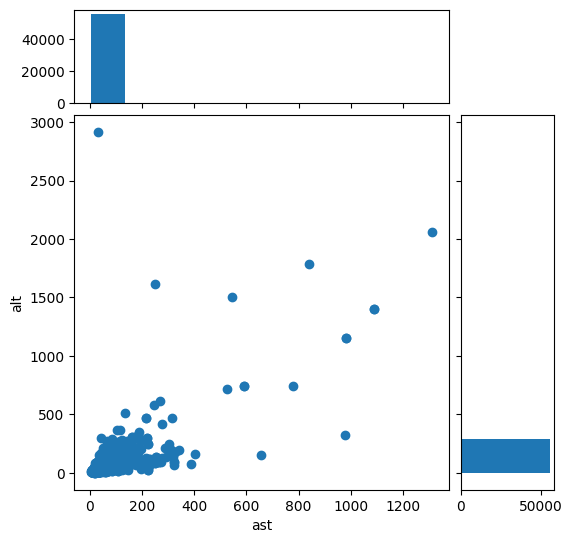

In [17]:
# Sergi: We will use regression for correlated features:
#  diastolicP <-> sistolicP
#  waist <-> weight
#  ldl <-> cholesterol
#  ast <-> alt
def scatter_hist(data, var1, var2, ax, ax_histx, ax_histy):
    x = data[var1]
    y = data[var2]
    
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

    ax_histx.hist(x)
    ax_histy.hist(y, orientation='horizontal')


for var1, var2 in [('diastolicP', 'systolicP'),('waist', 'weight'),('ldl', 'cholesterol'),('ast', 'alt')]:
    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                          left=0.1, right=0.9, bottom=0.1, top=0.9,
                          wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    scatter_hist(data, var1, var2, ax, ax_histx, ax_histy)

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)


Outlier group of data: 24 examples


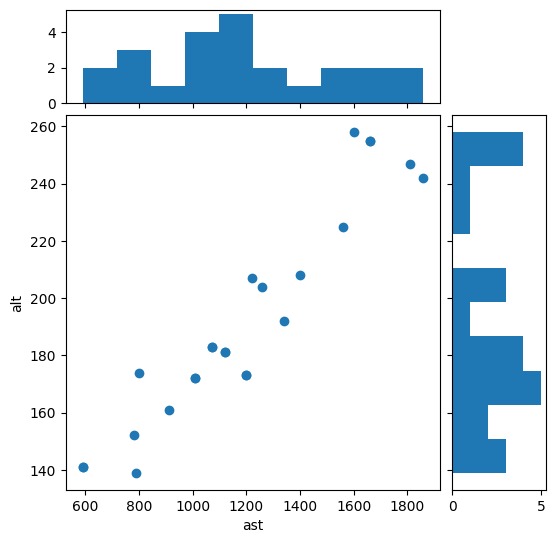

In [18]:
# Check outlier group in cholesterol to ldl

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

outlier_group_data = data[data.ldl > 500]

x = outlier_group_data['ldl']
y = outlier_group_data['cholesterol']

# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.scatter(x, y)
ax.set_xlabel(var1)
ax.set_ylabel(var2)

ax_histx.hist(x)
ax_histy.hist(y, orientation='horizontal')

print(f"Outlier group of data: {outlier_group_data.shape[0]} examples")

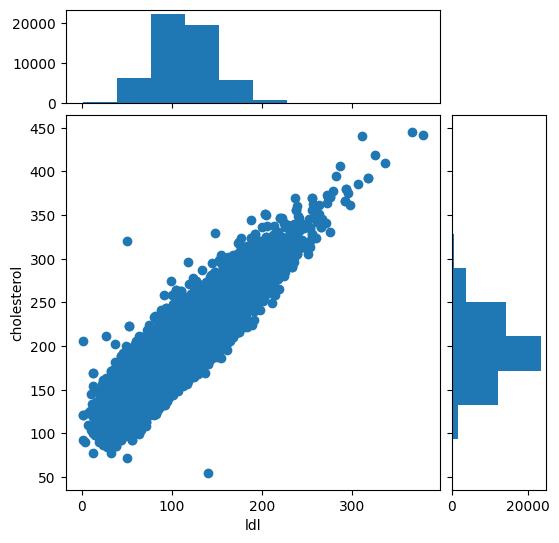

In [19]:
# Remove the ldl outliers from the data

data = data[data.ldl <= 500]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

scatter_hist(data, 'ldl', 'cholesterol', ax, ax_histx, ax_histy)

### Solving the error susbtituting current value by predicted value with linear regression 

#  Missing data

In [20]:
data.isnull().any()  # isnull() will return a Series with True and False in all positions, with any() we apply the
                     # logical any to all the values en each one of the features

# No data is null :]

gender          False
age             False
height          False
weight          False
waist           False
sightL          False
sightR          False
hearL           False
hearR           False
systolicP       False
diastolicP      False
fastBSugar      False
cholesterol     False
triglyceride    False
hdl             False
ldl             False
hemoglobin      False
uProtein        False
sCreatinine     False
ast             False
alt             False
gtp             False
caries          False
tartar          False
smoking         False
dtype: bool

#  Standardization of data

In [21]:
data_to_standardize = data.iloc[:, :-1]
target = data.iloc[:, -1]

scaler = StandardScaler()
data_standarized = scaler.fit_transform(data_to_standardize)
data_standarized = pd.DataFrame(data=data_standarized, columns=data_to_standardize.columns)

standData = data_standarized.assign(smoking=target)
standData.iloc[:, -1] = target # soluciona un bug on el .assign() coloca valors amb NA

# Checking that the values are the same
different_mask = [0 if data.iloc[i, -1] == standData.iloc[i, -1] else 1 for i in range(data.shape[0])]
print(sum(different_mask))
print(standData)

0
       gender    age  height  weight  waist  sightL  sightR  hearL  hearR  systolicP  diastolicP  fastBSugar  cholesterol  triglyceride    hdl    ldl  hemoglobin  uProtein  sCreatinine    ast    alt    gtp  caries  tartar  smoking
0      -1.320 -0.344  -1.050  -0.458 -0.079   0.619   0.022 -0.161 -0.163     -0.547  -3.101e-01      -0.255        0.498        -0.623  1.065  0.343      -1.100    -0.215       -0.851 -0.422 -0.259 -0.257  -0.521   0.894      0.0
1      -1.320 -0.344  -0.506  -0.458 -0.112  -0.607  -1.210 -0.161 -0.163     -0.181  -6.199e-01       1.477       -0.135        -0.163 -1.038  0.373      -1.228    -0.215       -1.310 -0.216 -0.259 -0.436  -0.521   0.894      0.0
2       0.758  0.900   0.581  -0.458 -0.220  -0.607  -0.594 -0.161 -0.163      1.208   1.033e+00      -0.495        1.242         0.773 -0.156  1.090       0.752    -0.215        0.526 -0.267 -0.356 -0.356  -0.521  -1.118      1.0
3       0.758 -0.344   0.037   0.322  0.643   1.538   1.562 -0.161 -0.163 

In [22]:
standData = pd.DataFrame(standData, columns=data.columns)
standData.to_csv(
    "./Dataset/Standardized_Smoking.csv",
    sep = ',', index=False)

# Normalization of data

In [23]:
scaler = MinMaxScaler()
scaler.fit(data)
normData = scaler.transform(data)

normData = pd.DataFrame(normData, columns=data.columns)
normData.to_csv(
    "./Dataset/Normalized_Smoking.csv",
    sep = ',', index=False)

# Storing data without normalization or standarization

In [24]:
data.to_csv(
    "./Dataset/Smoking_preprocessed.csv",
    sep = ',', index=False
)